<a href="https://colab.research.google.com/github/ernestomancebo/DeepLearningInPractice/blob/main/issa_cat_or_issa_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Issa cat or Issa Dog
This notebook atteps to do a binary classification for Cats and Dogs images from Kaggle datasets using a ConvNet.

For accomplish this, a Kaggle API key is needed.

#Initial Set Up

In [1]:
!pip install -q kaggle kaggle-cli

     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 5.3MB 9.1MB/s 
     |████████████████████████████████| 133kB 62.9MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 112kB 64.8MB/s 


We upload the Kaggle key

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ernestomancebo","key":"6226bf356f06f8df20279f8a38dd397a"}'}

Move such Kaggle key to a specific folder

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Download the dataset

In [4]:
!mkdir kaggle_original_data
!kaggle competitions download -c dogs-vs-cats -p kaggle_original_data

100% 542M/543M [00:03<00:00, 202MB/s]
100% 543M/543M [00:03<00:00, 168MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 91.4MB/s]
 99% 268M/271M [00:02<00:00, 122MB/s]
100% 271M/271M [00:02<00:00, 115MB/s]


Unzip the dataset into a specific folder

In [5]:
%%capture 
!cd kaggle_original_data/ && unzip 'test1.zip' -d 'test'
!cd kaggle_original_data/ && unzip 'train.zip' -d 'train'

Clean the unziped output folder

In [6]:
!cd kaggle_original_data/ && mv test/test1/* test/ && mv train/train/* train/
!cd kaggle_original_data/ && rm -r test/test1 && rm -r train/train
!cd kaggle_original_data/ && rm test1.zip && rm train.zip


Verify that there's data

In [7]:
!ls kaggle_original_data/train | head -11

cat.0.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10007.jpg
cat.10008.jpg
cat.10009.jpg


#Now the fun begins
Train and test data set up

Dataset structure definition

In [8]:
%%capture
import os, shutil

original_dataset_dir = 'kaggle_original_data'
base_dir = 'cats_and_dogs_small'

os.mkdir(base_dir)

directories = {}
data_directories = ['train', 'validation', 'test']
target_directories = ['cat', 'dog']

# Create train, validation and test directories
for data_dir in data_directories:
  directories[data_dir] = os.path.join(base_dir, data_dir)
  os.mkdir(directories[data_dir])

  for target_dir in target_directories:
    sub_dir = f"{data_dir}_{target_dir}"
    directories[sub_dir] = os.path.join(directories[data_dir], target_dir)
    os.mkdir(directories[sub_dir])

Populating the dataset folders

In [9]:
import shutil

source_train_dir = f'{original_dataset_dir}/train'

# Fill into the directories the train data
for target_dir in target_directories:
  fnames = ['{}.{}.jpg'.format(target_dir, i) for i in range(0, 1000)]
  # Train Data
  for fname in fnames:
    src = os.path.join(source_train_dir, fname)
    dst = os.path.join(directories[f'train_{target_dir}'], fname)
    shutil.copyfile(src, dst)

  # Test Data
  fnames = ['{}.{}.jpg'.format(target_dir, i) for i in range(1000, 1500)]
  for fname in fnames:
    src = os.path.join(source_train_dir, fname)
    dst = os.path.join(directories[f'test_{target_dir}'], fname)
    shutil.copyfile(src, dst)

  # Validation Data
  fnames = ['{}.{}.jpg'.format(target_dir, i) for i in range(1500, 2000)]
  for fname in fnames:
    src = os.path.join(source_train_dir, fname)
    dst = os.path.join(directories[f'validation_{target_dir}'], fname)
    shutil.copyfile(src, dst)

Exploring dataset split result

In [10]:
for d in directories.keys():
  if d == 'test' or d == 'train' or d == 'validation':
    continue
  print(f'Total {d} images: ', len(os.listdir(directories[d])))

Total train_cat images:  1000
Total train_dog images:  1000
Total validation_cat images:  500
Total validation_dog images:  500
Total test_cat images:  500
Total test_dog images:  500


#Building ConvNet network

In [ ]:
from keras import layers, models

# Init the model
model = models.Sequential()

# Convolution and MaxPooling operations - Feature Mapping
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
# Flattening and Target output
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Print an overview of the model.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Now we call `model.compile`.

In [ ]:
from keras import optimizers

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

##Data (image) pre-processing

In this block, we're pulling images in floating-ploint tensors from RGB data pieces.

The steps we're performing are:

1. Read the images files.
1. Decode the JPEG content into RGB grid of pixels.
1. Convert such grid of pixels into floating-point tensors.
1. Rescale the pixel values `[0, 255]` to `[0,1]`.

The step no. 4 is done by the `ImageDataGenerator` class. Steps from 1 to 3 are performed by `flow_from_directory`, meaning that all the files are pooled and transformed by this function.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# The step no. 4
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Steps from 1 to 3
train_generator = train_datagen.flow_from_directory(
    directories['train'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    directories['validation'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's review what the `train_generator` does for us on a single (just one, see the `break` keyword) batch.

In [ ]:
for (data_batch, labels_batch) in train_generator:
  print(f'Data batch shape: {data_batch.shape}')
  print(f'Label batch shape: {labels_batch.shape}')
  break

Data batch shape: (20, 150, 150, 3)
Label batch shape: (20,)


Now we run a train using `fit_generator`, is the same as the `fit` function, but consumes a generator as input.

In [ ]:
train_history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 16s 84ms/step - loss: 0.6956 - acc: 0.5248 - val_loss: 0.6730 - val_acc: 0.5920
Epoch 2/30
100/100 [==============================] - 8s 85ms/step - loss: 0.6666 - acc: 0.5731 - val_loss: 0.6391 - val_acc: 0.6350
Epoch 3/30
100/100 [==============================] - 8s 83ms/step - loss: 0.6107 - acc: 0.6737 - val_loss: 0.6067 - val_acc: 0.6860
Epoch 4/30
100/100 [==============================] - 8s 83ms/step - loss: 0.5661 - acc: 0.6976 - val_loss: 0.6584 - val_acc: 0.6330
Epoch 5/30
100/100 [==============================] - 8s 83ms/step - loss: 0.5347 - acc: 0.7337 - val_loss: 0.6106 - val_acc: 0.6670
Epoch 6/30
100/100 [==============================] - 8s 84ms/step - loss: 0.5202 - acc: 0.7388 - val_loss: 0.5887 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 8s 84ms/step - loss: 0.4733 - acc: 0.7744 - val_loss: 0.5904 - val_acc: 0.6840
Epoch 8/30
100/100 [==============================] - 8s 83ms/step -

#Model review

Now we save the trained model and review how it performed.

In [ ]:
!mkdir models

In [ ]:
model.save('models/cats_and_dogs_small_1.h5')

##Review the train and validation history

Ploting set up

In [ ]:
import matplotlib.pyplot as plt

# Train Accuracy
acc = train_history.history['acc']
val_acc = train_history.history['val_acc']

# Validation Accuracy
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

# Self explanatory
epochs = range(1, len(acc) + 1)

Plots accuracy for training and validation

<Figure size 432x288 with 0 Axes>

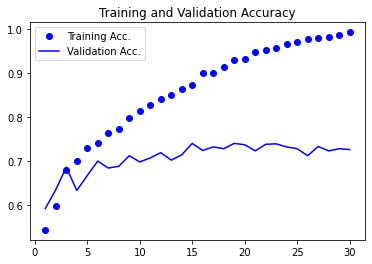

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training Acc.')
plt.plot(epochs, val_acc, 'b', label='Validation Acc.')
plt.title('Training and Validation Accuracy')

plt.legend()
plt.figure()

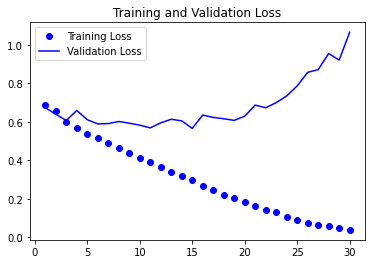

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')

plt.legend()
plt.show()

#Data Augmentation

Here we're doing some augmentation techniques using some Keras utilities, this is to be able to add some generalization by randomly applying transformations to the training data. 

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Let's now display some random images using the `datagen` object.

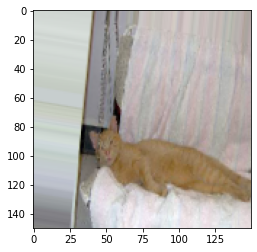

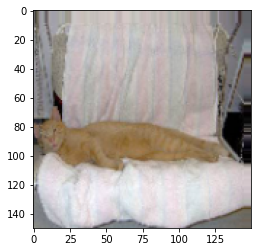

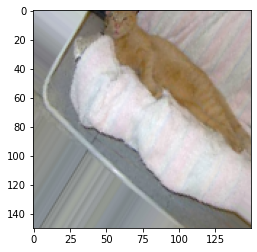

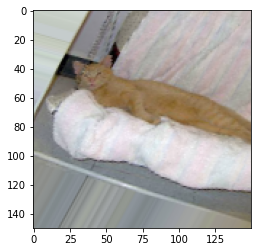

In [15]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(directories['train_cat'], fname) 
          for fname in os.listdir(directories['train_cat'])]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))

  i += 1
  if i%4 == 0:
    break

plt.show()

Perhaps this image is a tansformation (augmentation) from one in the dataset, is not the same. Although, it keeps correlation to the target concept (cat in this instance).

##A new ConvNet that includes `Dropout`

We are now defining a new ConvNet that includes a `Dropout` filter, meaning that this enforces the network to predict (in the activation section) a more compressed representation.

In [20]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Let's see how it is

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

A new set of generators. For the train generator, `Data Agumentation` is applied, so we generate samples randomly from the initial dataset so we can generalize better by tweaking a bit the original images.

In [17]:
# Apply data augmentation for the train data while generating.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# We don't do data augmentation for the validation.
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        directories['train'],
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        directories['validation'],
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Now we train the new network with more epochs.



In [24]:
%%capture

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

##Review the train and validation history

First we'll save the model and then review the history

In [28]:
model.save('models/cats_and_dogs_small_2.h5')

Execute this only in **google colab**

In [29]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [37]:
!mkdir -p /content/gdrive/My\ Drive/Deep\ Learning\ in\ Practice/models
!cp models/cats_and_dogs_small_2.h5 "/content/gdrive/My Drive/Deep Learning in Practice/models"

In [38]:
drive.flush_and_unmount()

Now we do plotting

In [25]:
# Train Accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']

# Validation Accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']

# Self explanatory
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

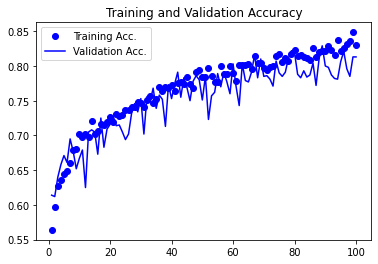

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, acc, 'bo', label='Training Acc.')
plt.plot(epochs, val_acc, 'b', label='Validation Acc.')
plt.title('Training and Validation Accuracy')

plt.legend()
plt.figure()

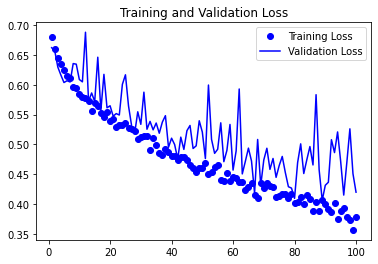

In [27]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')

plt.legend()
plt.show()